In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [336]:
dataset=pd.read_csv("train.csv")

In [337]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [338]:
dataset.shape

(614, 13)

In [339]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Identification of outliers:

<AxesSubplot:>

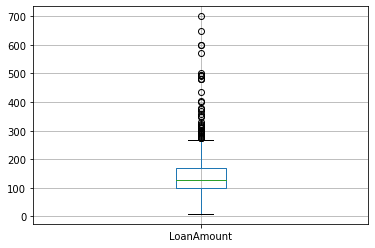

In [340]:
dataset.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

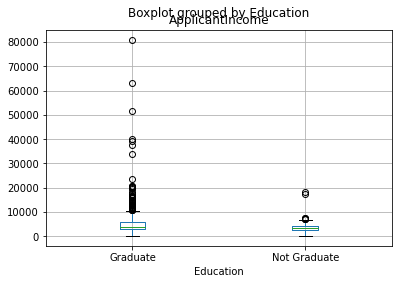

In [341]:
dataset.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot:>

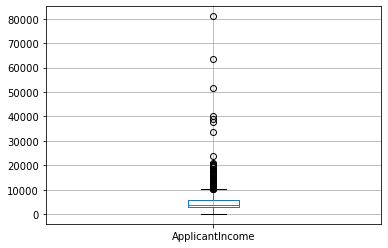

In [342]:
dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

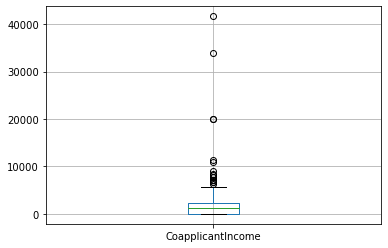

In [343]:
dataset.boxplot(column='CoapplicantIncome')

### Data Cleaning:

In [344]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [345]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [346]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [347]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [348]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

In [349]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)

In [350]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [351]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [352]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Normalizing

In [353]:
dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

<AxesSubplot:>

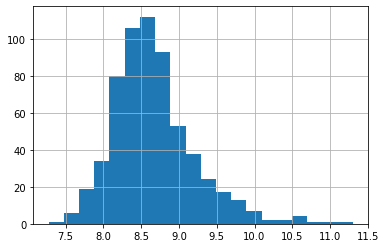

In [354]:
dataset['TotalIncome_log'].hist(bins=20)

In [355]:
#storing all independent variables
X= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
#storing dependent variab i.e loan elgibility status
y=dataset.iloc[:,12].values

In [356]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [357]:
#converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

In [358]:
X_train[:,0]=labelencoder_X.fit_transform(X_train[:,1])
X_train[:,1]=labelencoder_X.fit_transform(X_train[:,1])
X_train[:,2]=labelencoder_X.fit_transform(X_train[:,2])
X_train[:,3]=labelencoder_X.fit_transform(X_train[:,3])
X_train[:,4]=labelencoder_X.fit_transform(X_train[:,4])
X_train[:,5]=labelencoder_X.fit_transform(X_train[:,5])
X_train[:,7]=labelencoder_X.fit_transform(X_train[:,7])

In [359]:
X_test[:,0]=labelencoder_X.fit_transform(X_test[:,1])
X_test[:,1]=labelencoder_X.fit_transform(X_test[:,1])
X_test[:,2]=labelencoder_X.fit_transform(X_test[:,2])
X_test[:,3]=labelencoder_X.fit_transform(X_test[:,3])
X_test[:,4]=labelencoder_X.fit_transform(X_test[:,4])
X_test[:,5]=labelencoder_X.fit_transform(X_test[:,5])
X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [360]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [361]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

### Decision Tree classifier:

In [362]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier()
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [363]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [364]:
from sklearn import metrics
print('The accuracy of decision tree is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is: 0.7235772357723578


### Naive Bayes classifier: 

In [365]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [366]:
y_pred=NBClassifier.predict(X_test)

In [367]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [368]:
print('The accuracy of Naive Bayes is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is: 0.8373983739837398


### Predicting using testdataset

In [369]:
testdata=pd.read_csv('test.csv')
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [370]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [371]:
#cleaning test data
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Married'].fillna(testdata['Married'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean(),inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [372]:
testdata['LoanAmounr_log']=np.log(testdata['LoanAmount'])

In [373]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmounr_log       0
dtype: int64

In [374]:
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log']=np.log(dataset['TotalIncome'])

In [375]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmounr_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.674026
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.714568
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.006368
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.505323
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.699515


In [376]:
test= testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [377]:
test[:,0]=labelencoder_X.fit_transform(test[:,1])
test[:,1]=labelencoder_X.fit_transform(test[:,1])
test[:,2]=labelencoder_X.fit_transform(test[:,2])
test[:,3]=labelencoder_X.fit_transform(test[:,3])
test[:,4]=labelencoder_X.fit_transform(test[:,4])
test[:,5]=labelencoder_X.fit_transform(test[:,5])

### Result of Testing data: 

In [378]:
pred=NBClassifier.predict(test)

In [379]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

(array([ 64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 303.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

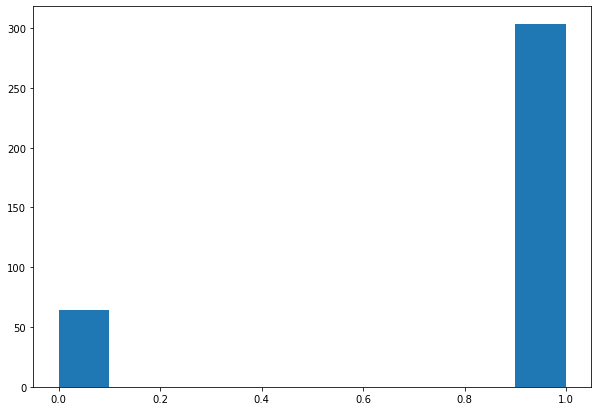

In [380]:
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(pred)